In [26]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
%matplotlib inline

In [28]:
# Loading the Dataset
df = pd.read_csv("R:/Customer Churn Prediction with Casual Analysis/data/raw/Customer_Churn_Prediction_Dataset.csv")

In [29]:
df.shape

(7043, 21)

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [33]:
# Check for missing values
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


In [34]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [35]:
df['TotalCharges'].fillna(0,inplace = True)

In [36]:
df['TotalCharges'].isnull().sum()

0

In [37]:
# Analyze the target variable
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

In [38]:
print("Churn distribution:")
print(churn_counts)
print(f"\n Churn percentage : {churn_percentage['Yes']:.2f}%")

Churn distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

 Churn percentage : 26.54%


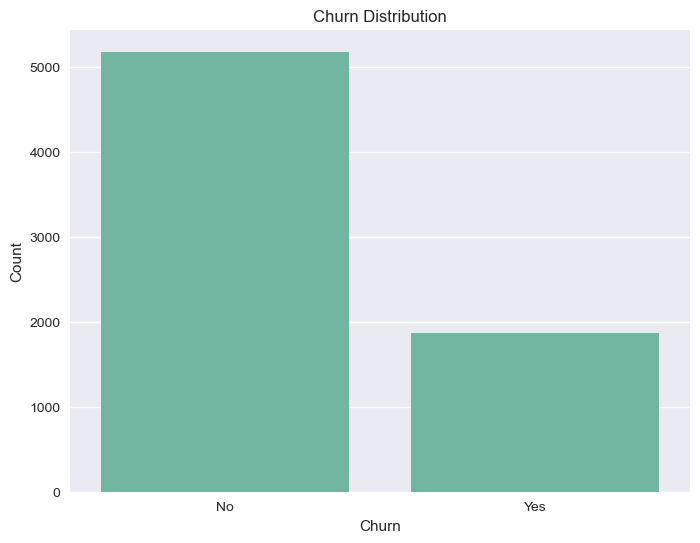

In [39]:
#PLot Churn distribution
plt.figure(figsize = (8,6))
sns.countplot(x = 'Churn' , data = df)
plt.title('Churn Distribution')
plt.ylabel('Count')
plt.savefig("R:/Customer Churn Prediction with Casual Analysis/results/Churn_distibution.png" , dpi = 300 , bbox_inches = 'tight')
plt.show()

In [40]:
# Indetifying Categorical Variables
categorical_cols = df.select_dtypes(include = ['object']).columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')

In [41]:
print("Categorical columns are:" , categorical_cols)

Categorical columns are: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']



--- gender ---
gender
Male      3555
Female    3488
Name: count, dtype: int64
 
 Churn rate by gender:
gender
Female    26.920872
Male      26.160338
Name: Churn, dtype: float64


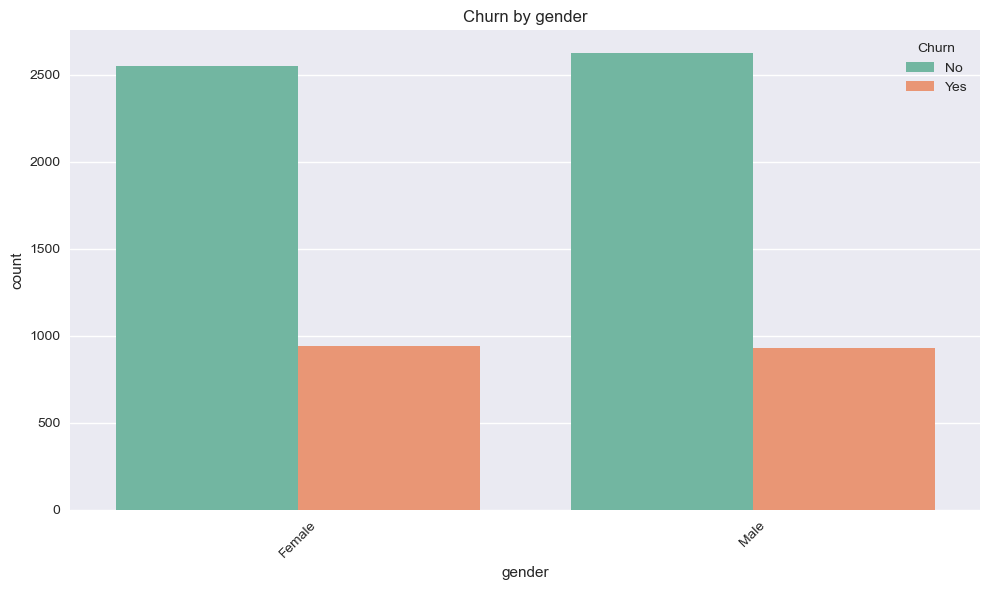


--- Partner ---
Partner
No     3641
Yes    3402
Name: count, dtype: int64
 
 Churn rate by Partner:
Partner
No     32.957979
Yes    19.664903
Name: Churn, dtype: float64


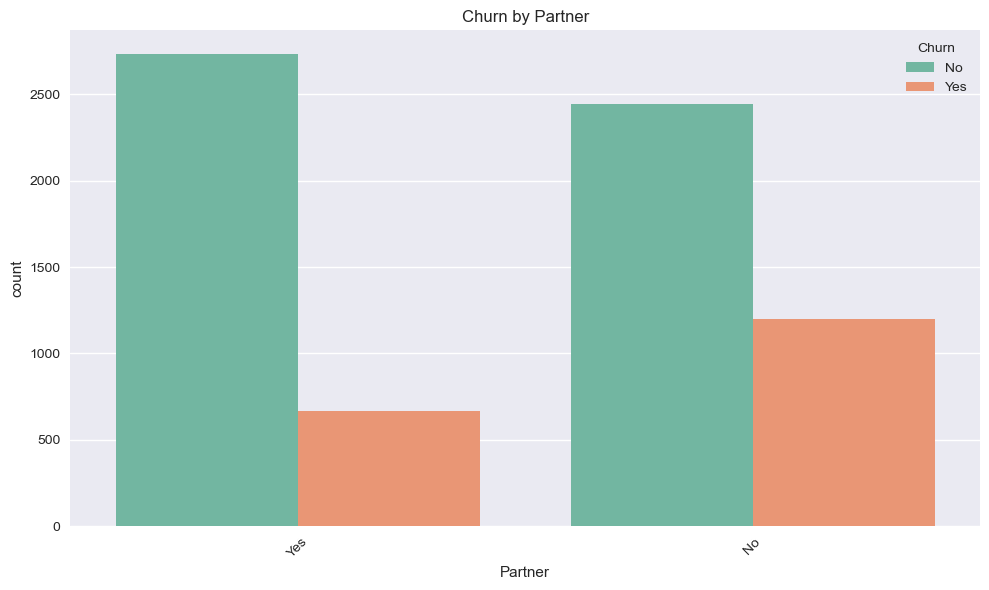


--- Dependents ---
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
 
 Churn rate by Dependents:
Dependents
No     31.279140
Yes    15.450237
Name: Churn, dtype: float64


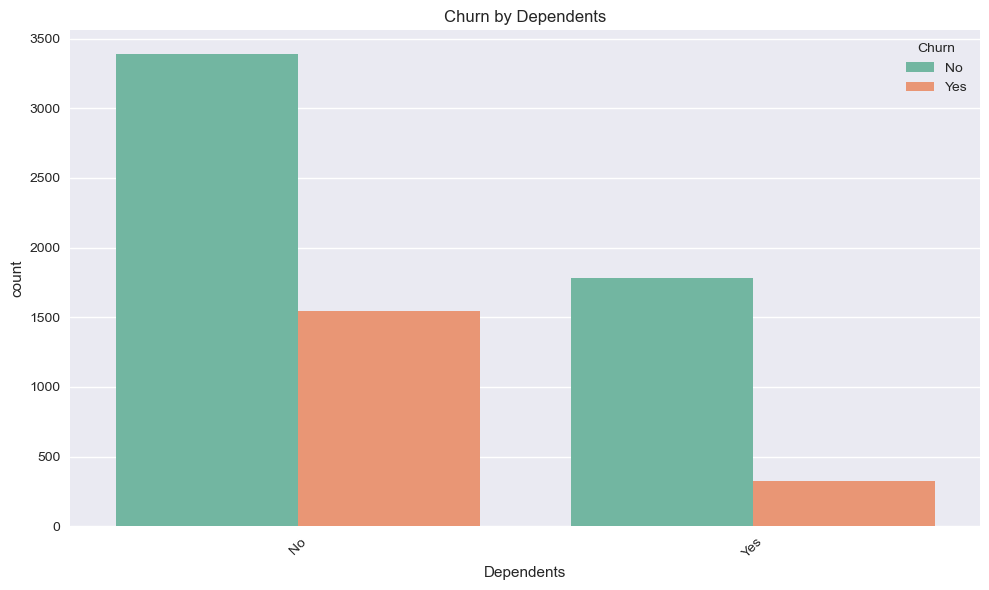


--- PhoneService ---
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
 
 Churn rate by PhoneService:
PhoneService
No     24.926686
Yes    26.709637
Name: Churn, dtype: float64


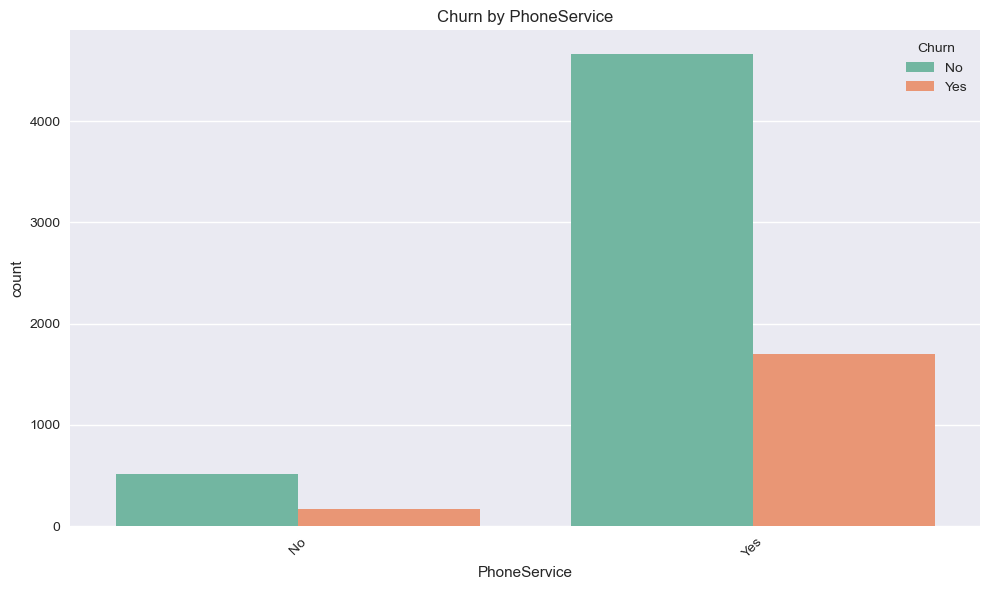


--- MultipleLines ---
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
 
 Churn rate by MultipleLines:
MultipleLines
No                  25.044248
No phone service    24.926686
Yes                 28.609896
Name: Churn, dtype: float64


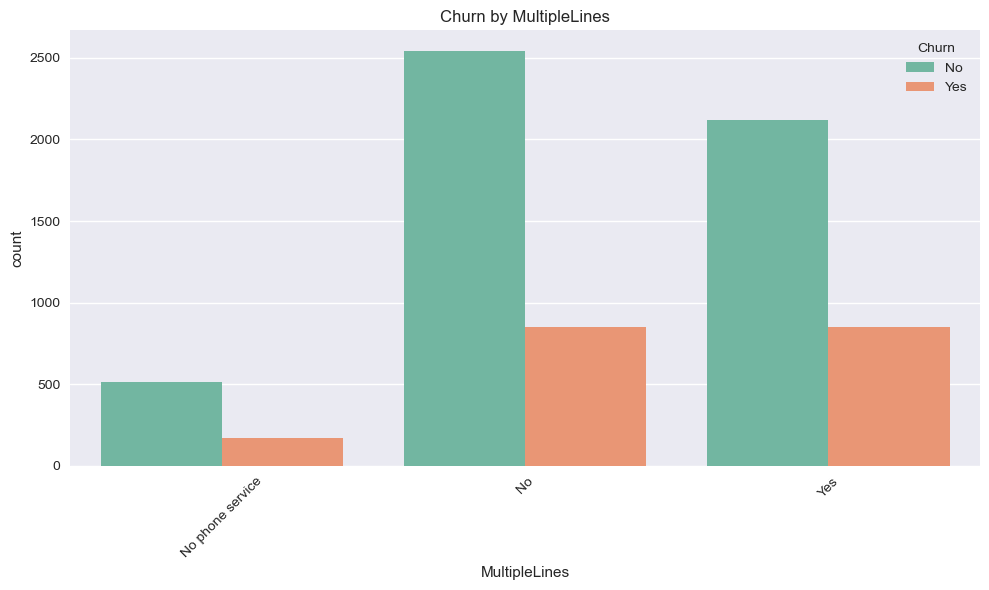


--- InternetService ---
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
 
 Churn rate by InternetService:
InternetService
DSL            18.959108
Fiber optic    41.892765
No              7.404980
Name: Churn, dtype: float64


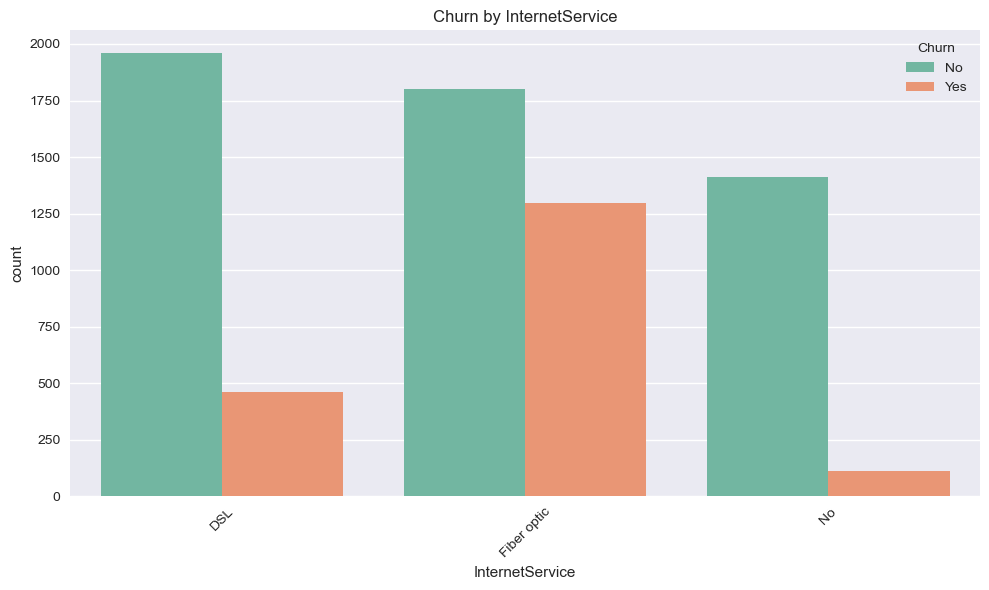


--- OnlineSecurity ---
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
 
 Churn rate by OnlineSecurity:
OnlineSecurity
No                     41.766724
No internet service     7.404980
Yes                    14.611194
Name: Churn, dtype: float64


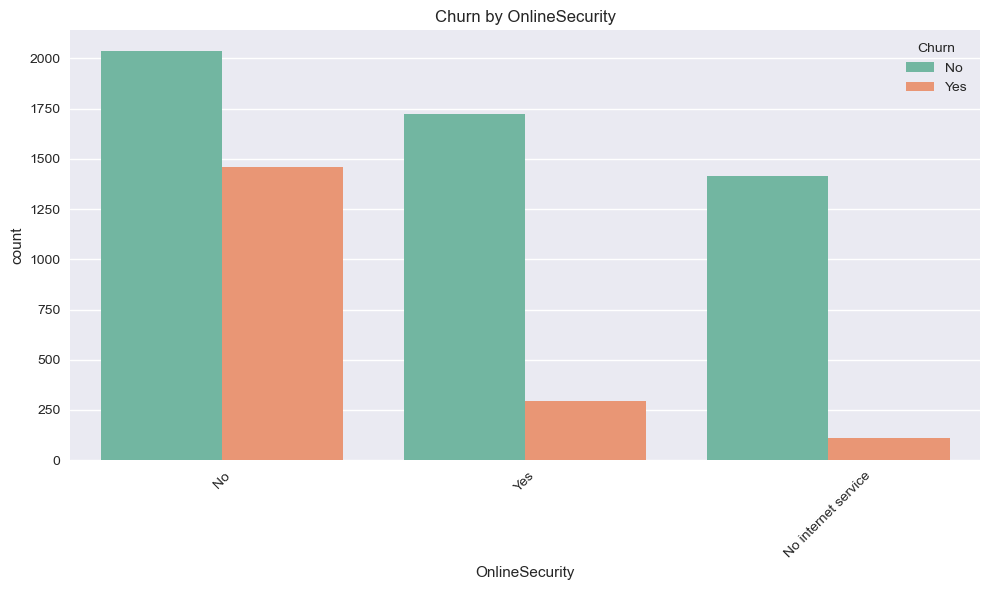


--- OnlineBackup ---
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
 
 Churn rate by OnlineBackup:
OnlineBackup
No                     39.928756
No internet service     7.404980
Yes                    21.531494
Name: Churn, dtype: float64


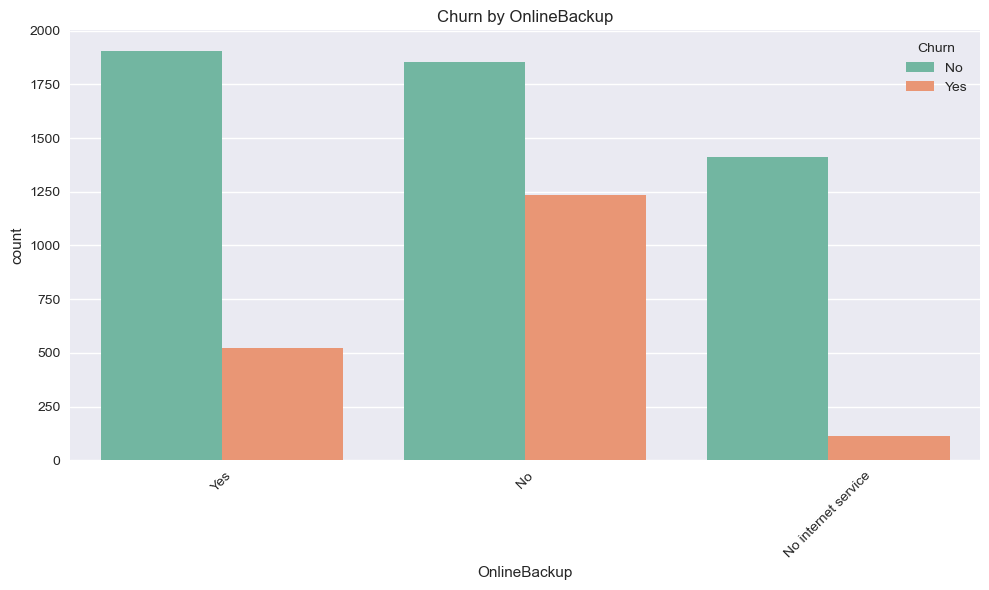


--- DeviceProtection ---
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
 
 Churn rate by DeviceProtection:
DeviceProtection
No                     39.127625
No internet service     7.404980
Yes                    22.502064
Name: Churn, dtype: float64


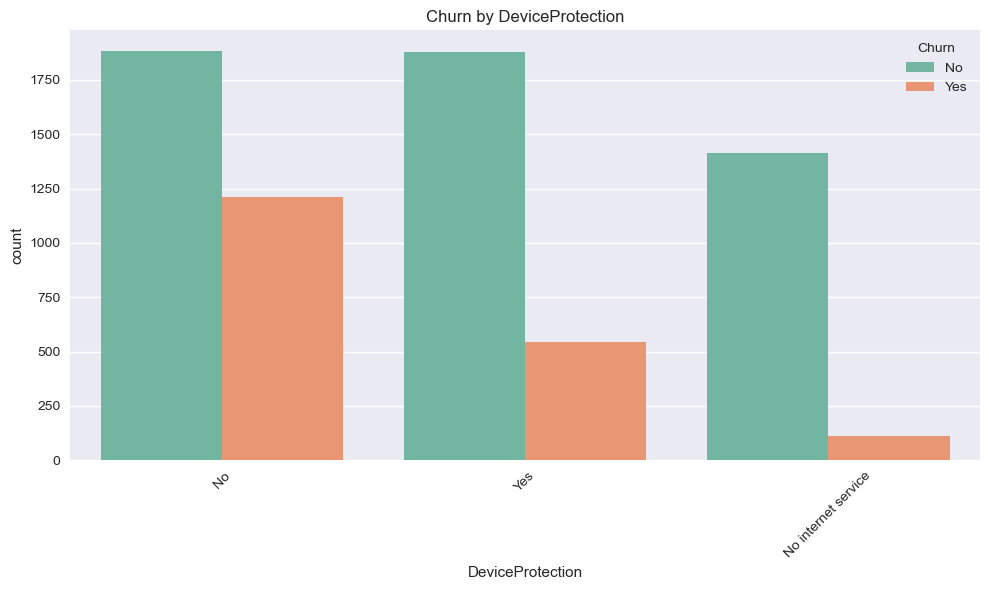


--- TechSupport ---
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
 
 Churn rate by TechSupport:
TechSupport
No                     41.635474
No internet service     7.404980
Yes                    15.166341
Name: Churn, dtype: float64


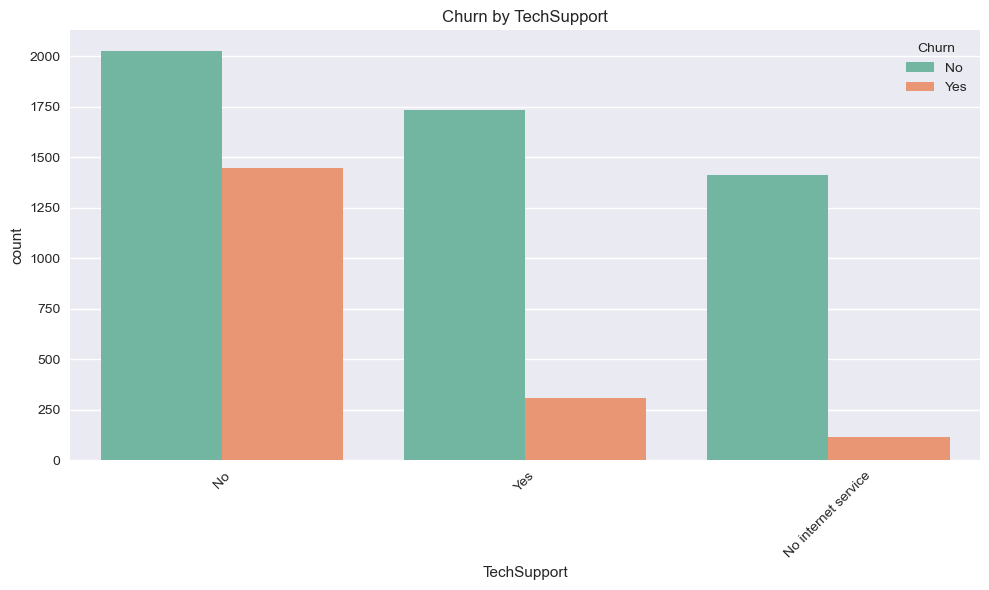


--- StreamingTV ---
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
 
 Churn rate by StreamingTV:
StreamingTV
No                     33.523132
No internet service     7.404980
Yes                    30.070188
Name: Churn, dtype: float64


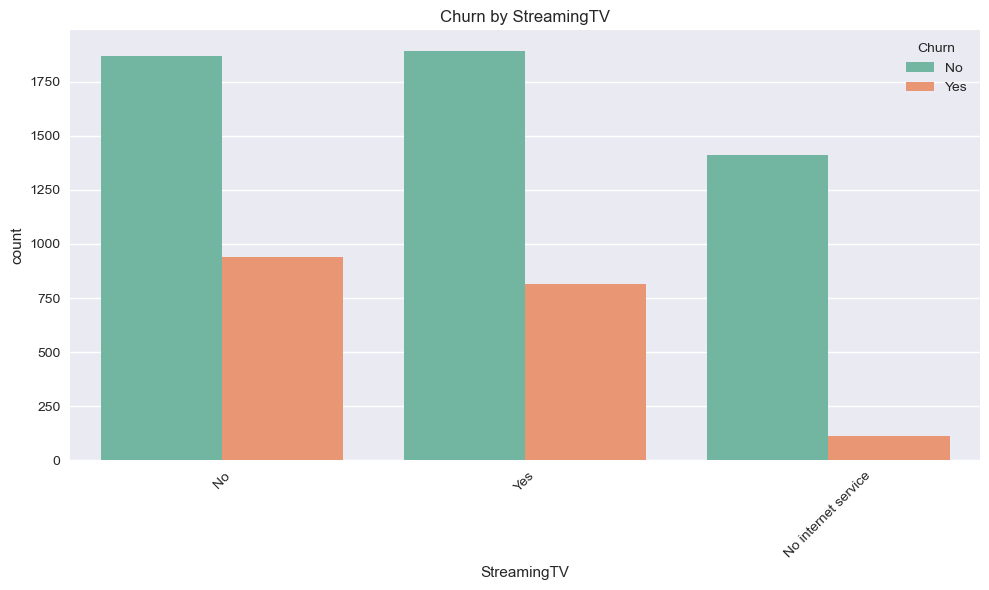


--- StreamingMovies ---
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
 
 Churn rate by StreamingMovies:
StreamingMovies
No                     33.680431
No internet service     7.404980
Yes                    29.941435
Name: Churn, dtype: float64


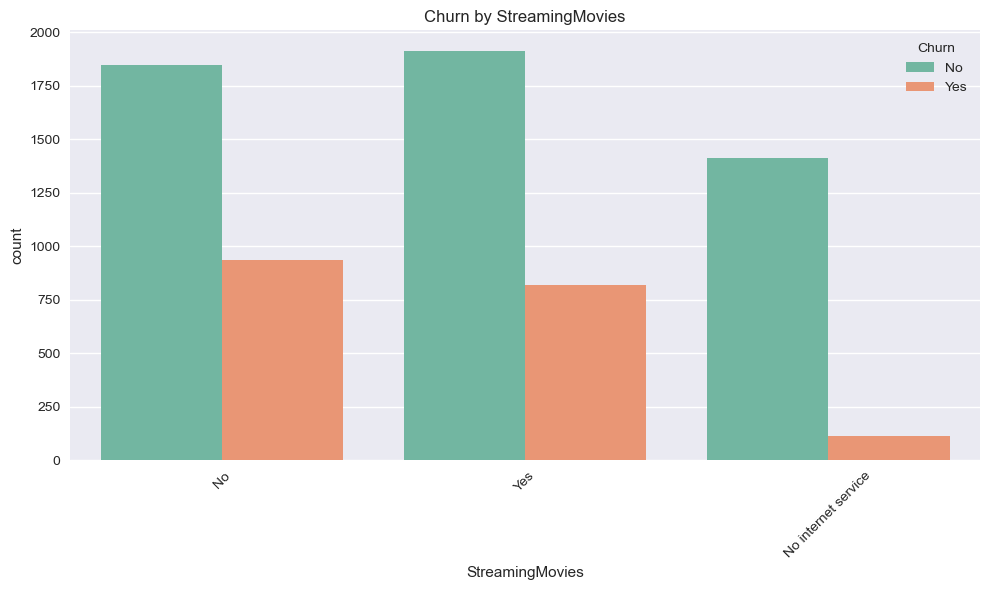


--- Contract ---
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
 
 Churn rate by Contract:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


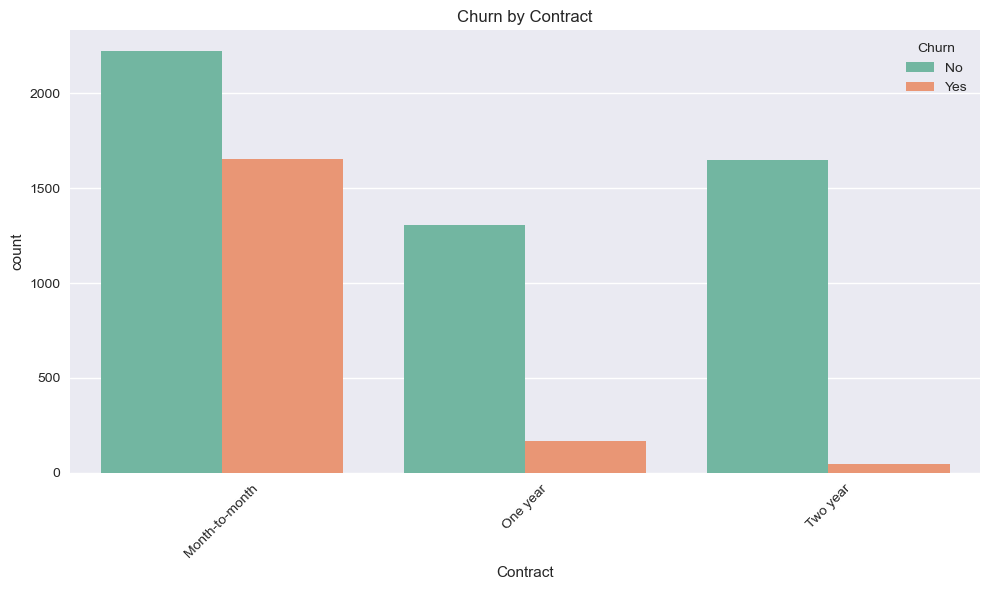


--- PaperlessBilling ---
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
 
 Churn rate by PaperlessBilling:
PaperlessBilling
No     16.330084
Yes    33.565092
Name: Churn, dtype: float64


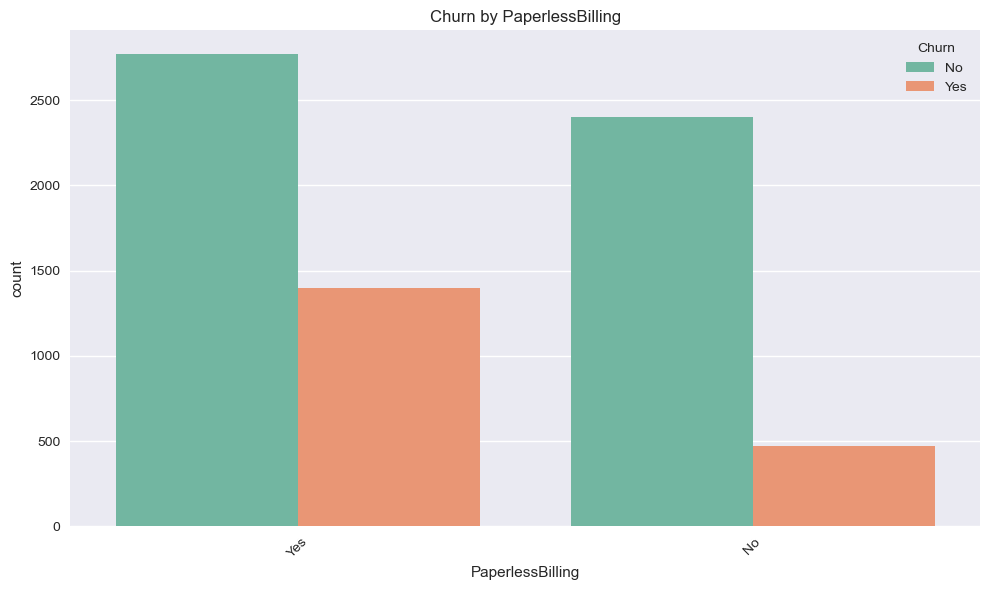


--- PaymentMethod ---
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
 
 Churn rate by PaymentMethod:
PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Churn, dtype: float64


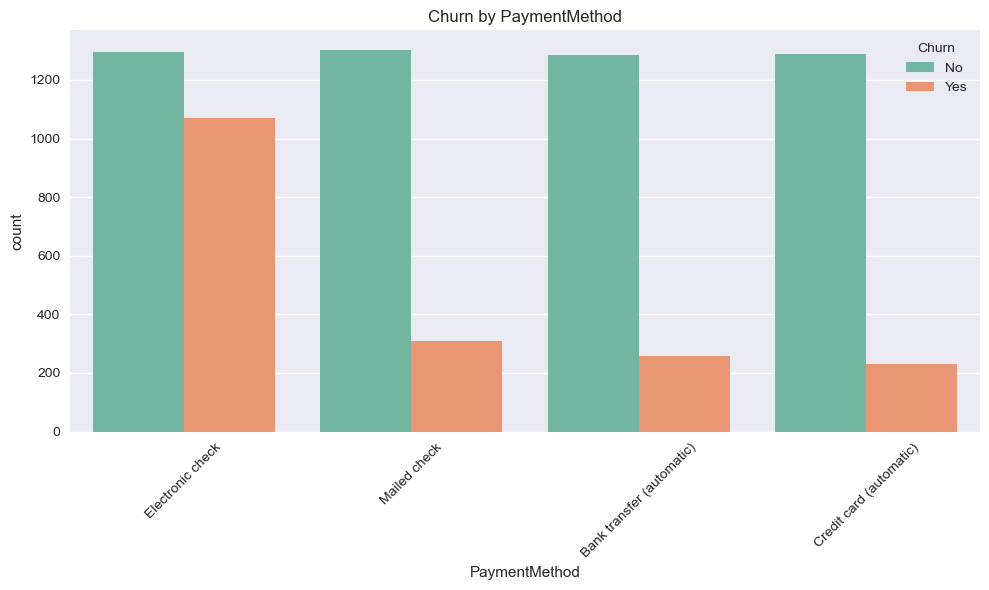

In [42]:
# Analyze each categorical variable with respect to churn
for col in categorical_cols:
    print(f"\n--- {col} ---")

    #Value counts
    print(df[col].value_counts())

    #Churn rate by category
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
    print(f" \n Churn rate by {col}:")
    print(churn_rate)

    #Visualization
    plt.figure(figsize = (10,6))
    sns.countplot(x = col , hue = 'Churn' , data = df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.savefig(f'R:/Customer Churn Prediction with Casual Analysis/results/Churn_by_{col}.png' , dpi = 300 , bbox_inches = 'tight')
    plt.show()

In [43]:
# Numerical cols
numerical_cols = ['tenure' , 'SeniorCitizen' , 'MonthlyCharges','TotalCharges']
print("Numerical columns : ",numerical_cols)

Numerical columns :  ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']


 
--- tenure ---


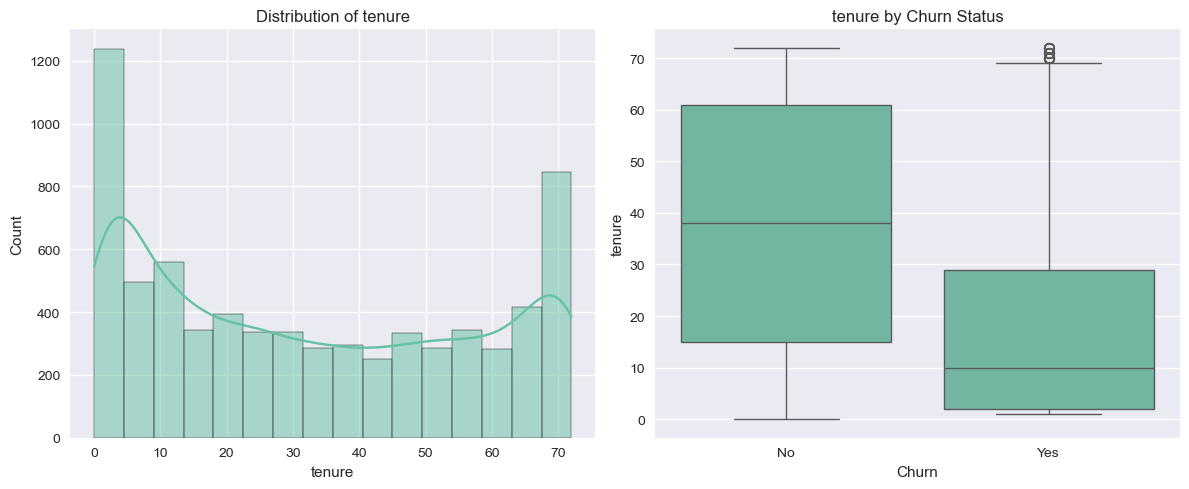

T-test for tenure : t-statistics = -34.824 , p-value = 1.195e-232
 
--- SeniorCitizen ---


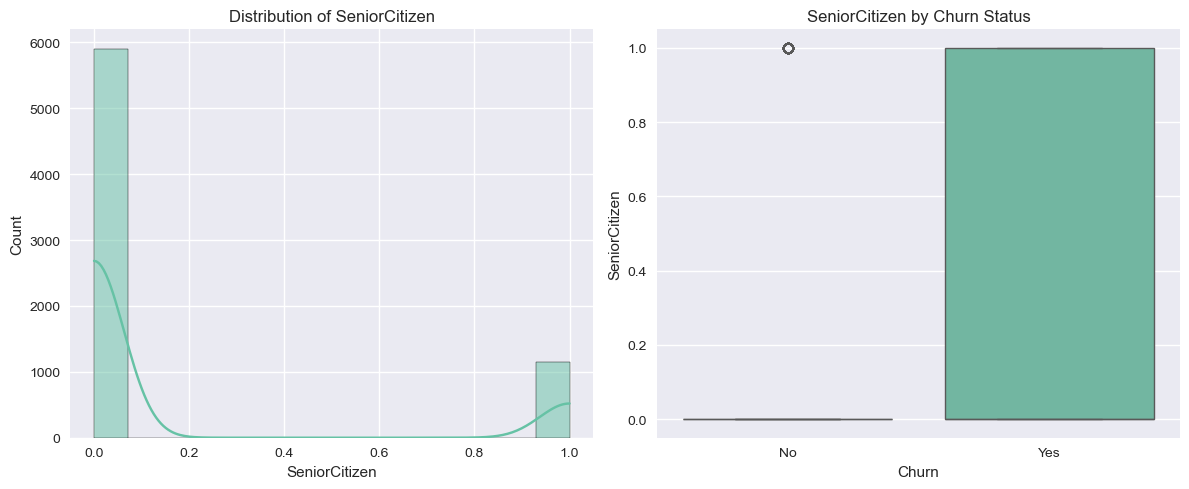

T-test for SeniorCitizen : t-statistics = 11.344 , p-value = 3.588e-29
 
--- MonthlyCharges ---


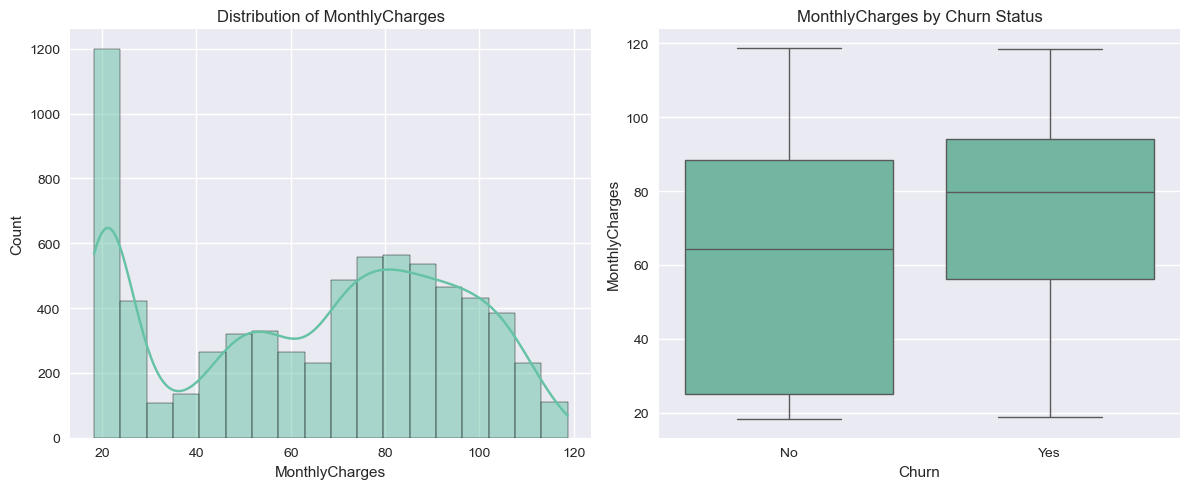

T-test for MonthlyCharges : t-statistics = 18.408 , p-value = 8.592e-73
 
--- TotalCharges ---


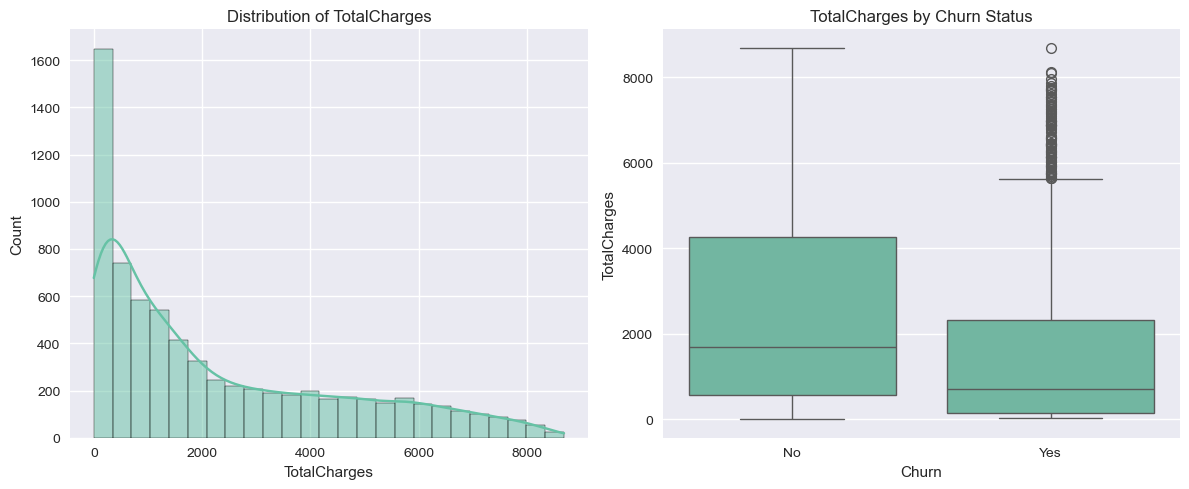

T-test for TotalCharges : t-statistics = -18.707 , p-value = 5.903e-75


In [44]:
# Analyze the distribution and the relationship with the churn
for col in numerical_cols:
    print(f" \n--- {col} ---")

    # Summary Statistics
    df[col].describe()

    # Distribution plot
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.histplot(df[col] , kde = True)
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x = 'Churn' , y = col , data = df)
    plt.title(f'{col} by Churn Status')

    plt.tight_layout()
    plt.savefig('R:/Customer Churn Prediction with Casual Analysis/results/{col}_analysis.png' , dpi = 300 , bbox_inches = 'tight')
    plt.show()

    # Statistical test
    from scipy.stats import ttest_ind

    churn_yes = df[df['Churn'] == 'Yes'][col]
    churn_no = df[df['Churn'] == 'No'][col]

    t_stat, p_value = ttest_ind(churn_yes, churn_no, equal_var=False)
    print(f"T-test for {col} : t-statistics = {t_stat:.3f} , p-value = {p_value:.3e}")

In [45]:
# Encode categorical variables for correlation analysis
df_encoded = df.copy()
le = LabelEncoder()

for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

In [46]:
# Encode target variable
df_encoded['Churn'] = df_encoded['Churn'].map({'No' : 0 , 'Yes' : 1})


In [47]:
# Calculate correlation matrix
corr_matrix = df_encoded.drop('customerID', axis=1).corr()

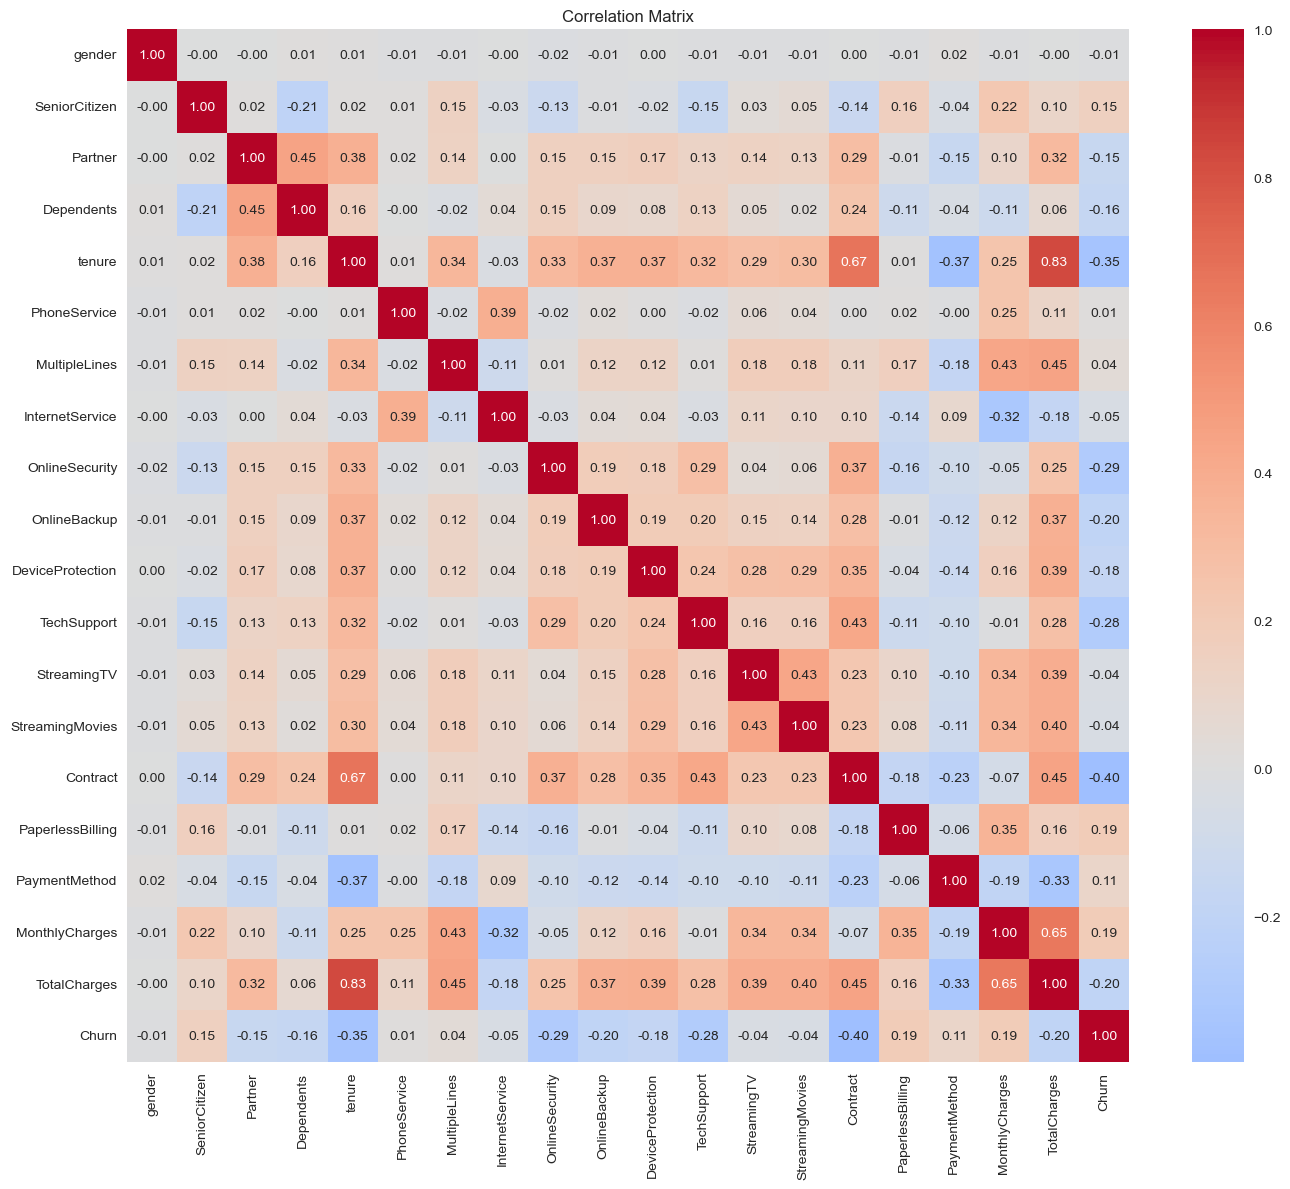

In [48]:
# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('R:/Customer Churn Prediction with Casual Analysis/results/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [49]:
# Top correlations with Churn
churn_corr = corr_matrix['Churn'].sort_values(key=abs, ascending=False)
print("Top correlations with Churn:")
print(churn_corr)

Top correlations with Churn:
Churn               1.000000
Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.198324
OnlineBackup       -0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection   -0.178134
Dependents         -0.164221
SeniorCitizen       0.150889
Partner            -0.150448
PaymentMethod       0.107062
InternetService    -0.047291
StreamingMovies    -0.038492
MultipleLines       0.038037
StreamingTV        -0.036581
PhoneService        0.011942
gender             -0.008612
Name: Churn, dtype: float64


In [50]:
# ## Key Insights

print("\n=== KEY INSIGHTS ===")
print(f"1. The dataset has {df.shape[0]} customers and {df.shape[1]} features.")
print(f"2. Churn rate is {churn_percentage['Yes']:.2f}%, indicating class imbalance.")
print(f"3. TotalCharges had {df['TotalCharges'].isnull().sum()} missing values, which were filled with 0.")
print(f"4. Top 3 features correlated with churn: {churn_corr.index[1:4].tolist()}")
print("5. MonthlyCharges and tenure show significant differences between churners and non-churners.")
print("6. Several categorical variables show clear patterns with churn (e.g., Contract, InternetService).")

# Save the cleaned dataset
df.to_csv('R:/Customer Churn Prediction with Casual Analysis/data/processed/telco_churn_cleaned.csv', index=False)
print("\nCleaned dataset saved to '../data/processed/telco_churn_cleaned.csv'")


=== KEY INSIGHTS ===
1. The dataset has 7043 customers and 21 features.
2. Churn rate is 26.54%, indicating class imbalance.
3. TotalCharges had 0 missing values, which were filled with 0.
4. Top 3 features correlated with churn: ['Contract', 'tenure', 'OnlineSecurity']
5. MonthlyCharges and tenure show significant differences between churners and non-churners.
6. Several categorical variables show clear patterns with churn (e.g., Contract, InternetService).

Cleaned dataset saved to '../data/processed/telco_churn_cleaned.csv'


*** 📊 Customer Churn Insights ***

Customer Tenure (Loyalty factor)

Customers who stay longer are much less likely to leave.

Most churn happens within the first year of joining.

👉 Business takeaway: Focus on onboarding and engagement programs in the early months to reduce quick churn.

Senior Citizens (Demographic factor)

Senior citizens show a higher churn rate compared to younger customers.

👉 Business takeaway: Provide special support plans, senior-friendly services, or discounts to retain this group.

Monthly Charges (Pricing factor)

Customers paying higher monthly charges tend to churn more often.

👉 Business takeaway: Consider flexible pricing plans, loyalty rewards, or discounts for high-value customers to improve retention.

📌 Final Summary

Churn is driven mainly by low tenure, higher age (senior citizens), and high monthly charges.
Retention strategies should focus on:

Improving early customer experience (reduce churn in the first year).

Tailored offers for seniors.

Re-evaluating pricing structure to reduce dissatisfaction among high-paying customers.

*** 📊 Correlation Analysis with Churn ***

Strongest Negative Correlations (protect against churn):

Contract (-0.40):
Longer contracts (1-year, 2-year) are strongly linked with lower churn.
👉 Lock-in contracts help keep customers loyal.

Tenure (-0.35):
Customers who’ve stayed longer are less likely to churn.
👉 The first year is the most critical period to prevent churn.

OnlineSecurity (-0.29), TechSupport (-0.28), OnlineBackup (-0.20), DeviceProtection (-0.18):
Customers with value-added services churn less.
👉 Bundling extra services increases customer stickiness.

TotalCharges (-0.20):
Customers with higher lifetime spend churn less.
👉 Long-term, high-value customers are more loyal.

Dependents (-0.16), Partner (-0.15):
Customers with family ties are less likely to leave.
👉 Households are harder to lose compared to individuals.

Positive Correlations (increase churn risk):

MonthlyCharges (0.19):
Higher monthly fees → higher churn risk.
👉 Pricing is a pain point. Consider flexible plans or discounts.

PaperlessBilling (0.19):
Paperless billing customers churn slightly more.
👉 May indicate younger, digital-savvy customers with lower loyalty.

SeniorCitizen (0.15):
Seniors are at higher churn risk.
👉 Need targeted retention offers for this group.

PaymentMethod (0.11):
Certain payment types (like electronic check) are linked with higher churn.
👉 Encouraging automatic or credit card payments may reduce churn.

Low/Negligible Correlations:

InternetService, Streaming, PhoneService, Gender → minimal effect on churn.
👉 These services/features do not strongly influence customer decisions.

✅ Key Drivers of Churn (ranked by importance):

Contract type (shorter contracts = churn risk)

Tenure (early churn is most likely)

Value-added services (security, support, backup) → reduce churn

High monthly charges → increase churn

Senior citizens + paperless billing → higher churn tendency

What a t-test does:

The t-test checks if the average tenure of two groups (Churn = Yes vs. No) is significantly different.

t-statistic → measures the size of the difference relative to variation.

Large |t| = big difference between groups.

p-value → tells you whether that difference could have happened by chance.

Small p-value (usually < 0.05) → difference is statistically significant.

🔹 Interpreting your result:

t-statistic = -34.824 → A very large negative number.

Means tenure is much lower for churned customers than for retained customers.

p-value ≈ 0.000… (1.195e-232) → Extremely small.

Practically zero → the difference is not due to random chance.

We can be 100% confident churners have significantly lower tenure.

Why this is important (business meaning):

Confirms that tenure is a strong predictor of churn.

Customers who leave tend to do so early in their lifecycle.

Retention strategies should focus on new customers in their first months/years.

✅ In summary:
The t-test proves that the average tenure of churned customers is significantly lower than those who stay. This validates tenure as a key factor in churn prediction and guides businesses to prioritize early engagement and loyalty-building